# Thomas Ngo
# Tevin Vu
# Rachana Chittari

# 1. Load and examine the Boston dataset’s features, target values, and description.

In [1]:
from sklearn import datasets
import pandas as pd

dataset_boston = datasets.load_boston()
df_boston_features = pd.DataFrame(data=dataset_boston.data, columns=[dataset_boston.feature_names])
dataset_boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

# 2.Use sklearn.model_selection.train_test_split() to split the features and values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
dataset_MEDV = dataset_boston.target
X, y = dataset_boston.data, dataset_MEDV.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False)

# 3.Create a scatterplot of the training set showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear?

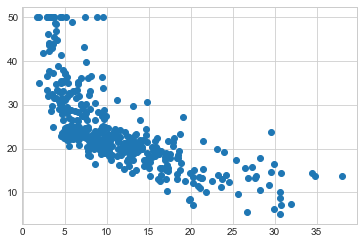

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
dataset_LSTAT = X_train[:,12].reshape([-1,1])
plt.scatter(dataset_LSTAT, y_train)

# Does the relationship appear to be linear?
## No, it doesn't

# 4.With LSTAT as X and MEDV as t, use np.linalg.inv() to compute w for the training set. What is the equation for MEDV as a linear function of LSTAT?

In [4]:
X = np.hstack((np.ones_like(dataset_LSTAT),dataset_LSTAT))
t = y_train
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print(w)

[[35.0961864 ]
 [-0.96173416]]


# Check the result of w using scikit-learn.LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(dataset_LSTAT, y_train)

print(f'w0 = {lm.intercept_}')
print(f'w1 = {lm.coef_[0]}')

w0 = [35.0961864]
w1 = [-0.96173416]


 # what is the equation for MEDV as a function of LSTAT?
$f(x;w_{0},w_{1}) = 35.096 - 0.961x$

# 5.Use w to add a line to your scatter plot from experiment (3). How well does the model appear to fit the training set?

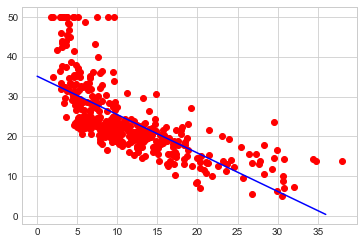

In [6]:
testx = np.linspace(0,36,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w)
plt.figure()
plt.plot(dataset_LSTAT,t,'ro')
plt.plot(testx,testt,'b')

# How well does the model appear to fit the training set?
## Not so well since there are a lot of outliers which are not fit into the model

# 6. Use w to find the response for each value of the LSTAT attribute in the test set, then compute the test MSE 𝓛 for the model.

In [7]:
XLS_test = X_test[:,12].reshape([-1,1])
testX = np.hstack((np.ones_like(XLS_test),XLS_test))
t_re = np.dot(testX,w)
mse = 0
for target, response in zip(y_test, t_re):
    mse += (target - response)**2
mse = mse/y_test.size
mse

array([22.99311506])

# 7. Now add an x2 column to LSTAT’s x column in the training set, then repeat experiments (4), (5), and (6) for MEDV as a quadratic function of LSTAT. Does the quadratic polynomial do a better job of predicting the values in the test set?

In [8]:
X_LSTAT_train = X_train[:,12].reshape([-1,1])
X_LSTAT = np.hstack((np.ones_like(X_LSTAT_train),X_LSTAT_train,X_LSTAT_train**2))
XX_LSTAT = np.dot(X_LSTAT.T,X_LSTAT)
invXX_LSTAT = np.linalg.inv(XX_LSTAT)
Xt_LSTAT = np.dot(X_LSTAT.T,y_train)
w_sq = np.dot(invXX_LSTAT,Xt_LSTAT)
print(w_sq)

[[43.55741498]
 [-2.44319997]
 [ 0.04767261]]


# what is the equation for MEDV as a function of LSTAT?
$f(x;w_{0},w_{1},w_{2}) = 43.557 - 2.443x + 0.047x^2$

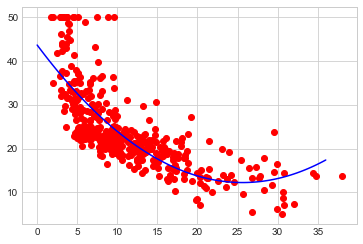

In [9]:
testx = np.linspace(0,36,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx,testx**2))
testt = np.dot(testX,w_sq)
plt.figure()
plt.plot(dataset_LSTAT,t,'ro')
plt.plot(testx,testt,'b')

# How well does the model appear to fit the training set?
## the model appear to fit the training set better than the previous model

In [10]:
XLS_test = X_test[:,12].reshape([-1,1])
testX = np.hstack((np.ones_like(XLS_test), XLS_test, XLS_test**2))
t_rsp = np.dot(testX,w_sq) 
mse = np.square(np.subtract(t_rsp, y_test)).mean()
print(mse)

18.095598402851596


Using other method to check the MSE

In [11]:
XLS_test = X_test[:,12].reshape([-1,1])
testX = np.hstack((np.ones_like(XLS_test),XLS_test, XLS_test**2))
t_re = np.dot(testX,w_sq)
mse = 0
for target, response in zip(y_test, t_re):
    mse += (target - response)**2
mse = mse/y_test.size
mse

array([18.0955984])

# Does the quadratic polynomial do a better job of predicting the values in the test set?
## Yes, it does because the new test MSE of quaradic (18.09) is less than the previous test MSE of linear (22.99)

# 8. Repeat experiment (4) with all 13 input features as X and using np.linalg.solve(). (See the Appendix to Linear regression in vector and matrix format for details.) Does adding additional features improve the performance on the test set compared to using only LSTAT?

In [12]:
X_13_ones_col = np.ones_like(X_train[:,0].reshape([-1,1]))
X_13_train = np.hstack((X_13_ones_col, X_train))
t_13 = y_train
XX_13 = np.dot(X_13_train.T,X_13_train)
# invXX_13 = np.linalg.inv(XX_13)
Xt_13 = np.dot(X_13_train.T,t_13)
# w_13 = np.dot(invXX_13,Xt_13)

w_13 = np.linalg.solve(XX_13, Xt_13)
print(w_13)

[[ 3.00771669e+01]
 [-2.02135297e-01]
 [ 4.41276341e-02]
 [ 5.26739364e-02]
 [ 1.88474315e+00]
 [-1.49281487e+01]
 [ 4.76038673e+00]
 [ 2.88734527e-03]
 [-1.30025278e+00]
 [ 4.61661953e-01]
 [-1.55434673e-02]
 [-8.11632369e-01]
 [-1.97174433e-03]
 [-5.32273431e-01]]


In [13]:
testX_13 = np.hstack((np.ones_like(X_test[:,0].reshape([-1,1])), X_test))
t_13_re = np.dot(testX_13,w_13) 
mse_13_test = np.square(np.subtract(t_13_re, y_test)).mean()
print(mse_13_test)

32.79986268019647


# Does adding additional features improve the performance on the test set compared to using only LSTAT?
## No since test set MSE of 13 features (32.799) is larger than test MSE of only LSTAT (22.99)

# 9. Now add x2 columns for all 13 features, and repeat experiment (8). Does adding quadratic features improve the performance on the test set compared to using only linear features?

In [23]:
X_sq_13 = np.hstack((X_13_ones_col, X_train))
for i in range(0,13):
    X_sq_13 = np.hstack((X_sq_13,(X_train[:,i]**2).reshape([-1,1])))
XX_sq_13 = np.dot(X_sq_13.T, X_sq_13)
# invXX_sq_13 = np.linalg.inv(XX_sq_13)
Xt_sq_13 = np.dot(X_sq_13.T, y_train)
# w_sq_13 = np.dot(invXX_sq_13, Xt_sq_13)
w_sq_13 = np.linalg.solve(XX_sq_13, Xt_sq_13)
w_sq_13

array([[ 1.79700135e+02],
       [-6.47400110e-01],
       [-4.67109034e-02],
       [ 1.32866822e-01],
       [ 4.78836982e+02],
       [-3.86386434e+01],
       [-1.77434743e+01],
       [-1.50067943e-02],
       [-2.47595052e+00],
       [ 6.91053085e-01],
       [-1.10828379e-01],
       [-6.32572868e+00],
       [ 4.29140123e-02],
       [-1.46669992e+00],
       [ 5.30027964e-03],
       [ 5.31658241e-04],
       [-4.74928936e-03],
       [-4.76513159e+02],
       [ 1.09204428e+01],
       [ 1.65372376e+00],
       [ 2.63279423e-04],
       [ 1.35832133e-01],
       [-3.43345004e-02],
       [ 1.47420987e-04],
       [ 1.56853953e-01],
       [-7.76658781e-05],
       [ 2.76622307e-02]])

In [15]:
testX_sq_13 = np.hstack((np.ones_like(X_test[:,0].reshape([-1,1])), X_test))
for i in range(0,13):
    testX_sq_13 = np.hstack((testX_sq_13,(X_test[:,i]**2).reshape([-1,1])))
t_sq_13_re = np.dot(testX_sq_13,w_sq_13) 
mse_sq_13_test = np.square(np.subtract(t_sq_13_re, y_test)).mean()
print(mse_sq_13_test)

33.968277413932036


# Does adding quadratic features improve the performance on the test set compared to using only linear features?
## No, it doesn't because the MSE of quadratic (33.968) is larger than MSE of linear (32.799) when using all 13 features.

# 10. Compute the training MSE for experiments (8) and (9) and compare it to the test MSE. What explains the difference?

In [16]:
trainX_13 = np.hstack((np.ones_like(X_train[:,0].reshape([-1,1])), X_train))
t_13_re = np.dot(trainX_13,w_13) 
mse_13_train = np.square(np.subtract(t_13_re, y_train)).mean()
print(mse_13_train)

22.77837952180079


In [17]:
trainX_sq_13 = np.hstack((np.ones_like(X_train[:,0].reshape([-1,1])), X_train))
for i in range(0,13):
    trainX_sq_13 = np.hstack((trainX_sq_13,(X_train[:,i]**2).reshape([-1,1])))
t_sq_13_re = np.dot(trainX_sq_13,w_sq_13) 
mse_sq_13_train = np.square(np.subtract(t_sq_13_re, y_train)).mean()
print(mse_sq_13_train)

14.48563658672095


# What explains the difference?
## When computing the training MSE for linear and quadratic on 13 features. We got:
+ The training MSE of linear = 22.778
+ The training MSE of quadratic = 14.485
- Thus, training MSE of linear > training MSE of quadratic on training set. Otherwise, test MSE of linear < test MSE of quadratic when we compute the mean squared loss on test set. The explanation for the difference is that 80% of training set is more likely close to quadratic model. So, when we compute the MSE of each model on training set, the quadratic model is going to fit more data than linear model. This results the lower training MSE for quadratic model. On the other hand, 20% of test set probably has the data pattern close to the linear model so that test MSE of linear is lower than the test MSE of quadratic model.

# 11. Repeat experiments (9) and (10), adding x3 columns in addition to the existing x and x2 columns for each feature. Does the cubic polynomial do a better job of predicting the values in the training set? Does it do a better job of predicting the values in the test set?

Compute test MSE of cubic model

In [24]:
X_cube_13 = np.hstack((X_13_ones_col, X_train))
for j in range(2,4):
    for i in range(0,13):
        X_cube_13 = np.hstack((X_cube_13,(X_train[:,i]**j).reshape([-1,1])))
XX_cube_13 = np.dot(X_cube_13.T, X_cube_13)
Xt_cube_13 = np.dot(X_cube_13.T, y_train)
w_cube_13 = np.linalg.solve(XX_cube_13, Xt_cube_13)
w_cube_13

array([[ 4.30206802e+01],
       [-1.15811318e+00],
       [ 6.21214602e-02],
       [-4.57846126e-01],
       [ 8.78469703e+12],
       [ 9.78647486e+02],
       [-3.68434990e+01],
       [ 7.82862221e-02],
       [-8.40516937e+00],
       [ 6.22543240e-01],
       [-2.01909982e-01],
       [-5.17550794e+00],
       [ 1.81778410e-02],
       [-1.99227288e+00],
       [ 2.24217608e-02],
       [-2.86117321e-03],
       [ 6.76663550e-02],
       [-8.78469704e+12],
       [-1.67706582e+03],
       [ 4.67162273e+00],
       [-1.93227113e-03],
       [ 1.16454494e+00],
       [-5.98730114e-02],
       [ 4.61419614e-04],
       [ 2.86533236e-02],
       [ 7.02995732e-05],
       [ 7.27097636e-02],
       [-1.35394274e-04],
       [ 2.67373715e-05],
       [-2.08096358e-03],
       [ 1.05203673e+03],
       [ 8.91928370e+02],
       [-1.55209586e-01],
       [ 1.24215988e-05],
       [-5.30949520e-02],
       [ 2.69249511e-03],
       [-3.52206498e-07],
       [ 3.59807791e-03],
       [-2.2

In [19]:
testX_cube_13 = np.hstack((np.ones_like(X_test[:,0].reshape([-1,1])), X_test))
for j in range(2,4):
    for i in range(0,13):
        testX_cube_13 = np.hstack((testX_cube_13,(X_test[:,i]**j).reshape([-1,1])))
t_cube_13_re = np.dot(testX_cube_13,w_cube_13) 
mse_cube_13_test = np.square(np.subtract(t_cube_13_re, y_test)).mean()
print(mse_cube_13_test)

27.926592074102015


Compute training MSE of cubic model

In [20]:
testX_cube_13 = np.hstack((np.ones_like(X_train[:,0].reshape([-1,1])), X_train))
for j in range(2,4):
    for i in range(0,13):
        testX_cube_13 = np.hstack((testX_cube_13,(X_train[:,i]**j).reshape([-1,1])))
t_cube_13_re = np.dot(testX_cube_13,w_cube_13) 
mse_cube_13_train = np.square(np.subtract(t_cube_13_re, y_train)).mean()
print(mse_cube_13_train)

12.803089873567984


# Conclusion:
## For training set,
- The training MSE of linear = 22.778
- The training MSE of quadratic = 14.485
- The training MSE of cubic = 12.803
## Does the cubic polynomial do a better job of predicting the values in the training set?
### Yes, it does a better job because it has the lowest MSE on the training set.

## For test set,
- The test MSE of linear = 32.799
- The test MSE of quadratic = 33.968
- The test MSE of cubic = 27.926
## Does the cubic polynomial do a better job of predicting the values in the training set?
### Yes, it does a better job because it has the lowest MSE on the test set as well.